### Core analysis comparing behaviours (eg. trip length, day-of-week patterns, start/end stations heatmaps)

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import numpy as np

sys.path.append('/Users/kanghong/Documents/Developer/Google-Capstone/cyclist-case-study/src/')

from trip_analysis import extract_month, season_match
from user_segmentation import generate_prop_plot

In [31]:
cyclistic_data = pd.read_csv('/Users/kanghong/Documents/Developer/Google-Capstone/cyclist-case-study/data/processed/cyclistic_data_cleaned.csv')

cyclistic_data.head()

,rideable_type,started_at,ended_at,start_lat,start_lng,end_lat,end_lng,membership_status,ride_length,ride_distance(km),start_day,end_day
0,classic_bike,2024-05-25 15:52:42,2024-05-25 16:11:50,41.892278,-87.612043,41.902973,-87.631280,casual,00:19:08,1.990,Saturday,Saturday
1,classic_bike,2024-05-14 15:11:51,2024-05-14 15:22:00,42.010587,-87.662412,42.001044,-87.661198,casual,00:10:09,1.065,Tuesday,Tuesday
2,classic_bike,2024-05-30 17:46:04,2024-05-30 18:09:16,41.892278,-87.612043,41.870769,-87.625734,member,00:23:12,2.646,Thursday,Thursday
3,electric_bike,2024-05-17 20:21:54,2024-05-17 20:40:32,41.892270,-87.611946,41.936253,-87.652662,member,00:18:38,5.939,Friday,Friday
4,classic_bike,2024-05-22 18:52:20,2024-05-22 18:59:04,41.903486,-87.643353,41.902973,-87.631280,casual,00:06:44,1.003,Wednesday,Wednesday


In [32]:
cyclistic_data['membership_status'].value_counts()

membership_status
member    3621380
casual    2106546
Name: count, dtype: int64

In [33]:
'''casual_cyclistic_data = cyclistic_data.loc[cyclistic_data['membership_status'] == 'casual']
member_cyclistic_data = cyclistic_data.loc[cyclistic_data['membership_status'] == 'member']'''

"casual_cyclistic_data = cyclistic_data.loc[cyclistic_data['membership_status'] == 'casual']\nmember_cyclistic_data = cyclistic_data.loc[cyclistic_data['membership_status'] == 'member']"

#### Compare rideables, ride length and ride distance

In [34]:
cyclistic_data['rideable_type'].value_counts()

rideable_type
electric_bike       3056209
classic_bike        2527393
electric_scooter     144324
Name: count, dtype: int64

In [35]:
freq_rideable = cyclistic_data.groupby(['membership_status', 'rideable_type']).size().unstack(fill_value=0)
print(freq_rideable)

rideable_type      classic_bike  electric_bike  electric_scooter
membership_status                                               
casual                   918949        1102392             85205
member                  1608444        1953817             59119


In [36]:
prop_rideable = freq_rideable.div(freq_rideable.sum(axis=1), axis=0)*100
print(prop_rideable)

rideable_type      classic_bike  electric_bike  electric_scooter
membership_status                                               
casual                43.623496      52.331732          4.044773
member                44.415223      53.952278          1.632499


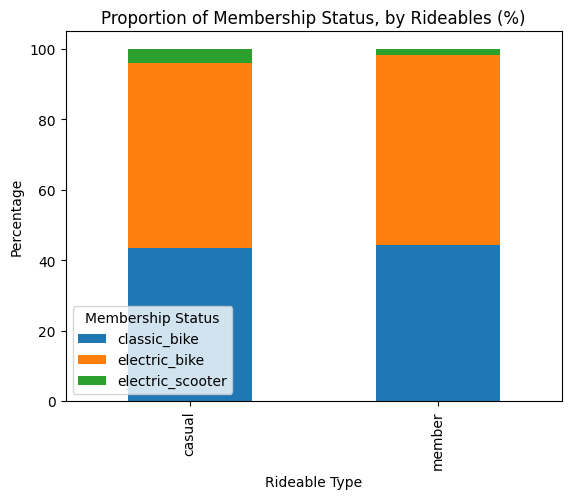

In [37]:
prop_rideable.plot(kind='bar', stacked=True)

plt.title('Proportion of Membership Status, by Rideables (%)')
plt.xlabel('Rideable Type')
plt.ylabel('Percentage')
plt.legend(title='Membership Status')

plt.show()

In [38]:
def time_to_minutes(time_str):
    h, m, s = map(int, time_str.split(':'))
    return h * 60 + m + s / 60

cyclistic_data['ride_length(min)'] = cyclistic_data['ride_length'].apply(time_to_minutes)

/var/folders/p5/x7yhrwkj5_54__9llg9vgy600000gn/T/ipykernel_24064/1547140878.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='membership_status', y='ride_length(min)', data=cyclistic_data, palette='viridis')


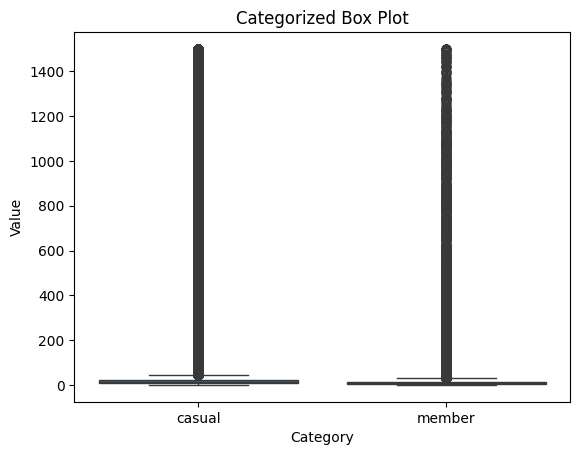

In [39]:
sns.boxplot(x='membership_status', y='ride_length(min)', data=cyclistic_data, palette='viridis')

# Customize the plot
plt.title('Categorized Box Plot')
plt.xlabel('Category')
plt.ylabel('Value')

# Show the plot
plt.show()

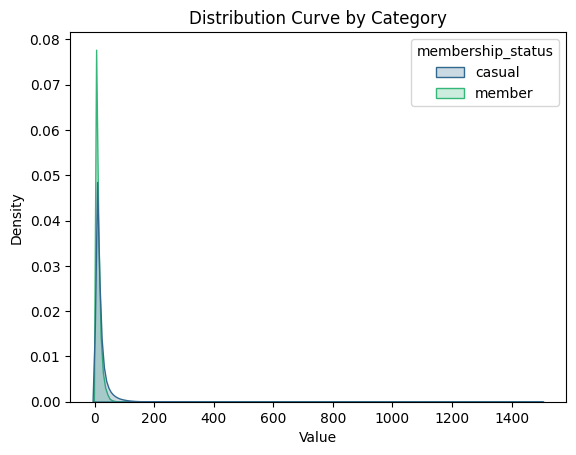

In [40]:
sns.kdeplot(data=cyclistic_data, x='ride_length(min)', hue='membership_status', palette='viridis', fill=True, common_norm=False)

# Customize the plot
plt.title('Distribution Curve by Category')
plt.xlabel('Value')
plt.ylabel('Density')

# Show the plot
plt.show()

/var/folders/p5/x7yhrwkj5_54__9llg9vgy600000gn/T/ipykernel_24064/1369405317.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='membership_status', y='ride_length(min)', data=cyclistic_data, palette='viridis')


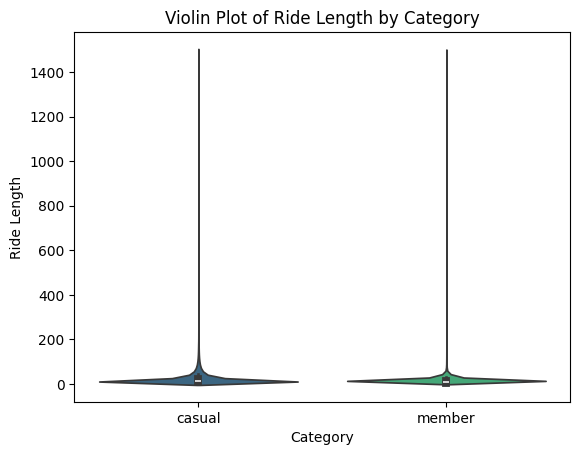

In [41]:
sns.violinplot(x='membership_status', y='ride_length(min)', data=cyclistic_data, palette='viridis')

# Customize the plot
plt.title('Violin Plot of Ride Length by Category')
plt.xlabel('Category')
plt.ylabel('Ride Length')

# Show the plot
plt.show()

#### Compare days of riding

In [42]:
freq_rideable = cyclistic_data.groupby(['membership_status', 'start_day']).size().unstack(fill_value=0)
print(freq_rideable)

start_day          Friday  Monday  Saturday  Sunday  Thursday  Tuesday  \
membership_status                                                        
casual             324488  243876    432825  353035    262804   223578   
member             530991  515462    470194  402712    557899   549985   

start_day          Wednesday  
membership_status             
casual                265940  
member                594137  


In [43]:
prop_rideable = freq_rideable.div(freq_rideable.sum(axis=1), axis=0)*100
print(prop_rideable)

start_day             Friday     Monday   Saturday     Sunday   Thursday  \
membership_status                                                          
casual             15.403794  11.577056  20.546667  16.758950  12.475588   
member             14.662670  14.233856  12.983835  11.120402  15.405702   

start_day            Tuesday  Wednesday  
membership_status                        
casual             10.613488  12.624457  
member             15.187166  16.406370  


##### Members ride more throughout the week, casuals ride more on the weekends

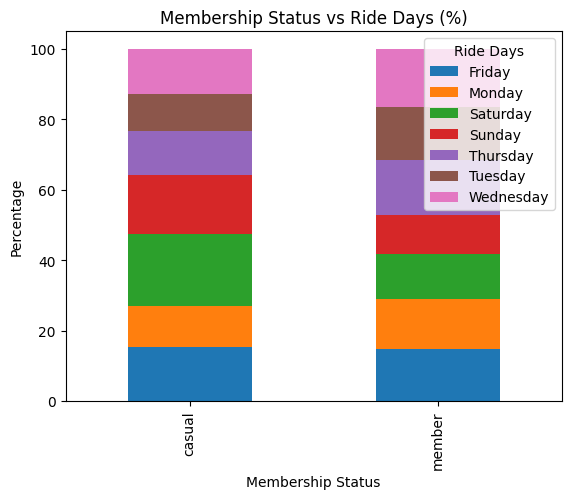

In [44]:
prop_rideable.plot(kind='bar', stacked=True)

plt.title('Membership Status vs Ride Days (%)')
plt.xlabel('Membership Status')
plt.ylabel('Percentage')
plt.legend(title='Ride Days')

plt.show()

In [45]:

pivot_table = cyclistic_data.pivot_table(
    values='ride_length(min)', 
    index='membership_status', 
    columns='start_day', 
    aggfunc='mean')


print(pivot_table)


start_day             Friday     Monday   Saturday     Sunday   Thursday  \
membership_status                                                          
casual             20.285379  19.989715  23.436523  23.829582  18.245327   
member             11.919865  11.476232  13.291922  13.382661  11.605363   

start_day            Tuesday  Wednesday  
membership_status                        
casual             17.716930  18.285619  
member             11.453127  11.715960  


#### Casual rides longer than members

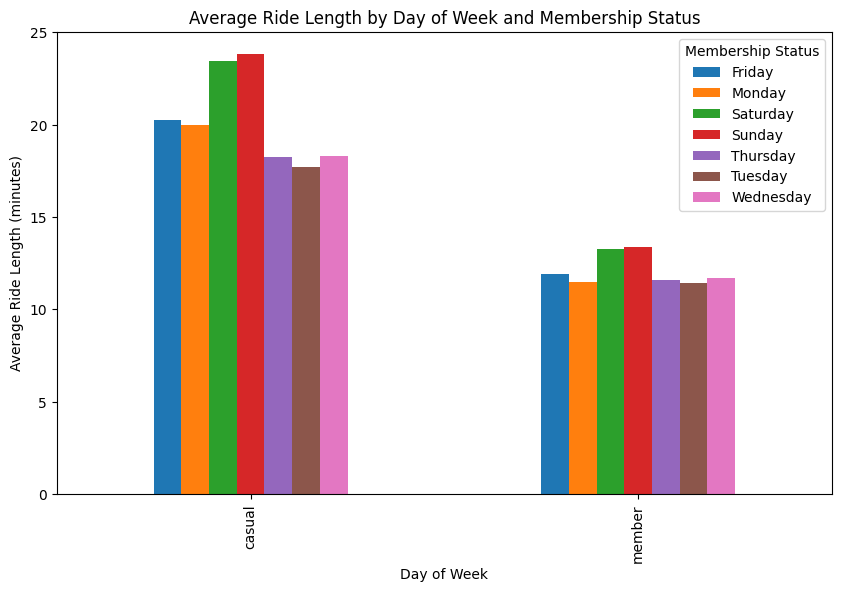

In [46]:
pivot_table.plot(kind='bar', figsize=(10, 6))

# Customize the plot
plt.title('Average Ride Length by Day of Week and Membership Status')
plt.xlabel('Day of Week')
plt.ylabel('Average Ride Length (minutes)')
plt.legend(title='Membership Status')

# Show the plot
plt.show()

#### Number of rides for users by day

In [47]:
pivot_table = cyclistic_data.pivot_table(
    index='start_day', 
    columns='membership_status', 
    aggfunc='size')


print(pivot_table)

membership_status  casual  member
start_day                        
Friday             324488  530991
Monday             243876  515462
Saturday           432825  470194
Sunday             353035  402712
Thursday           262804  557899
Tuesday            223578  549985
Wednesday          265940  594137


#### Members ride more frequently compared to members

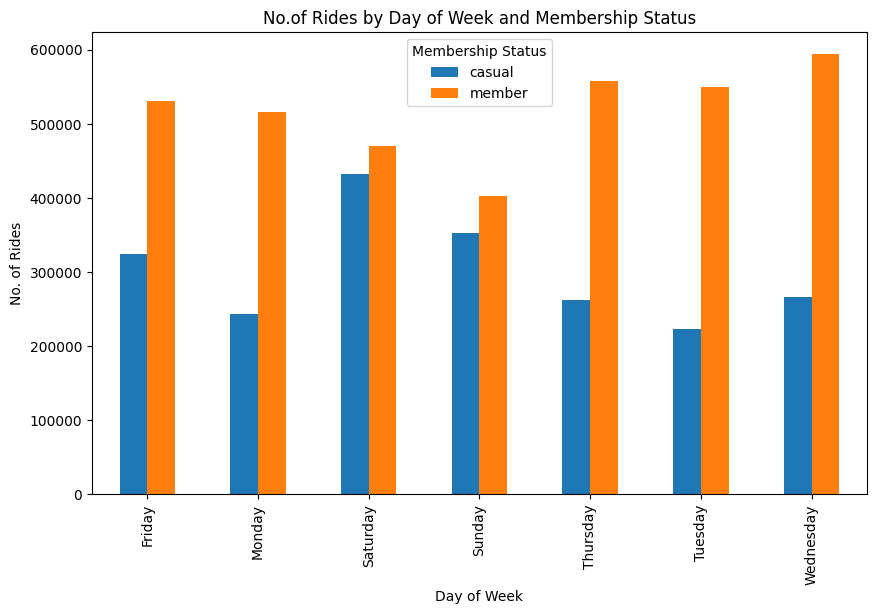

In [48]:
pivot_table.plot(kind='bar', figsize=(10, 6))

# Customize the plot
plt.title('No.of Rides by Day of Week and Membership Status')
plt.xlabel('Day of Week')
plt.ylabel('No. of Rides')
plt.legend(title='Membership Status')

# Show the plot
plt.show()

In [49]:
'''
map_center = [cyclistic_data['start_lat'].mean(), cyclistic_data['start_lng'].mean()]
mymap = folium.Map(location=map_center, zoom_start=2)

# Add markers for each location
for _, row in cyclistic_data.iterrows():
    folium.Marker([row['start_lat'], row['start_lng']]).add_to(mymap)

# Save the map to an HTML file
mymap.save('testmap.html')
'''

"\nmap_center = [cyclistic_data['start_lat'].mean(), cyclistic_data['start_lng'].mean()]\nmymap = folium.Map(location=map_center, zoom_start=2)\n\n# Add markers for each location\nfor _, row in cyclistic_data.iterrows():\n    folium.Marker([row['start_lat'], row['start_lng']]).add_to(mymap)\n\n# Save the map to an HTML file\nmymap.save('testmap.html')\n"

#### Explore seasonal trends, holidays
#### Explore monthly trends
#### Explore time of rides, peak hours
#### Explore hotspots, and geographic clustering

In [50]:
cyclistic_data.shape

(5727926, 13)

In [51]:
'''sampled_data = cyclistic_data.sample(frac=0.01)
sampled_data.shape'''


'sampled_data = cyclistic_data.sample(frac=0.01)\nsampled_data.shape'

In [52]:
'''import geopandas as gpd

gdf = gpd.GeoDataFrame(sampled_data, geometry=gpd.points_from_xy(sampled_data.start_lng, sampled_data.start_lat))'''

'import geopandas as gpd\n\ngdf = gpd.GeoDataFrame(sampled_data, geometry=gpd.points_from_xy(sampled_data.start_lng, sampled_data.start_lat))'

In [53]:
'''from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5)
gdf['cluster'] = kmeans.fit_predict(gdf[['start_lat', 'start_lng']])'''

"from sklearn.cluster import KMeans\n\nkmeans = KMeans(n_clusters=5)\ngdf['cluster'] = kmeans.fit_predict(gdf[['start_lat', 'start_lng']])"

In [54]:
'''from folium.plugins import HeatMap

map_center = [gdf['start_lat'].mean(), gdf['start_lng'].mean()]
mymap = folium.Map(location=map_center, zoom_start=12)

# Create a heatmap layer
heat_data = [[row['start_lat'], row['start_lng']] for _, row in sampled_data.iterrows()]
HeatMap(heat_data).add_to(mymap)

# Save the map to an HTML file
mymap.save('bike-sharing-heatmap.html')'''

"from folium.plugins import HeatMap\n\nmap_center = [gdf['start_lat'].mean(), gdf['start_lng'].mean()]\nmymap = folium.Map(location=map_center, zoom_start=12)\n\n# Create a heatmap layer\nheat_data = [[row['start_lat'], row['start_lng']] for _, row in sampled_data.iterrows()]\nHeatMap(heat_data).add_to(mymap)\n\n# Save the map to an HTML file\nmymap.save('bike-sharing-heatmap.html')"

In [55]:
cyclistic_data.head()

,rideable_type,started_at,ended_at,start_lat,start_lng,end_lat,end_lng,membership_status,ride_length,ride_distance(km),start_day,end_day,ride_length(min)
0,classic_bike,2024-05-25 15:52:42,2024-05-25 16:11:50,41.892278,-87.612043,41.902973,-87.631280,casual,00:19:08,1.990,Saturday,Saturday,19.133333
1,classic_bike,2024-05-14 15:11:51,2024-05-14 15:22:00,42.010587,-87.662412,42.001044,-87.661198,casual,00:10:09,1.065,Tuesday,Tuesday,10.150000
2,classic_bike,2024-05-30 17:46:04,2024-05-30 18:09:16,41.892278,-87.612043,41.870769,-87.625734,member,00:23:12,2.646,Thursday,Thursday,23.200000
3,electric_bike,2024-05-17 20:21:54,2024-05-17 20:40:32,41.892270,-87.611946,41.936253,-87.652662,member,00:18:38,5.939,Friday,Friday,18.633333
4,classic_bike,2024-05-22 18:52:20,2024-05-22 18:59:04,41.903486,-87.643353,41.902973,-87.631280,casual,00:06:44,1.003,Wednesday,Wednesday,6.733333


In [56]:
cyclistic_data = extract_month(cyclistic_data)
cyclistic_data.head()

,rideable_type,started_at,ended_at,start_lat,start_lng,end_lat,end_lng,membership_status,ride_length,ride_distance(km),start_day,end_day,ride_length(min),month_idx
0,classic_bike,2024-05-25 15:52:42,2024-05-25 16:11:50,41.892278,-87.612043,41.902973,-87.631280,casual,00:19:08,1.990,Saturday,Saturday,19.133333,5
1,classic_bike,2024-05-14 15:11:51,2024-05-14 15:22:00,42.010587,-87.662412,42.001044,-87.661198,casual,00:10:09,1.065,Tuesday,Tuesday,10.150000,5
2,classic_bike,2024-05-30 17:46:04,2024-05-30 18:09:16,41.892278,-87.612043,41.870769,-87.625734,member,00:23:12,2.646,Thursday,Thursday,23.200000,5
3,electric_bike,2024-05-17 20:21:54,2024-05-17 20:40:32,41.892270,-87.611946,41.936253,-87.652662,member,00:18:38,5.939,Friday,Friday,18.633333,5
4,classic_bike,2024-05-22 18:52:20,2024-05-22 18:59:04,41.903486,-87.643353,41.902973,-87.631280,casual,00:06:44,1.003,Wednesday,Wednesday,6.733333,5


In [57]:
spring_cyclistic_data = season_match(cyclistic_data, 'spring')
summer_cyclistic_data = season_match(cyclistic_data, 'summer')
autumn_cyclistic_data = season_match(cyclistic_data, 'autumn')
winter_cyclistic_data = season_match(cyclistic_data, 'winter')

rideable_type      classic_bike  electric_bike
membership_status                             
casual                43.941855      56.058145
member                43.228094      56.771906


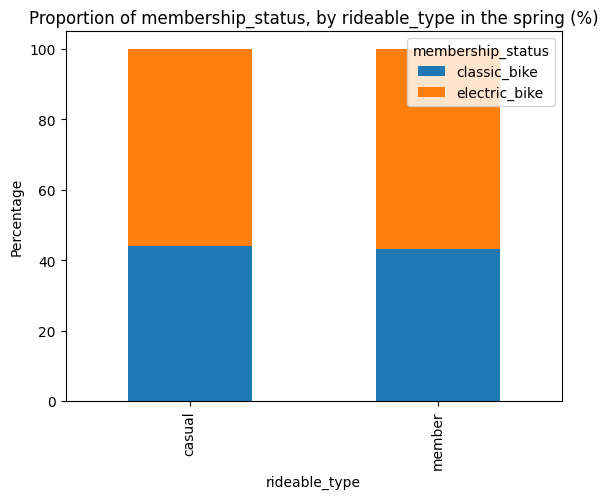

In [59]:
generate_prop_plot(spring_cyclistic_data, 'membership_status', 'rideable_type', 'spring')

In [60]:
generate_prop_plot(spring_cyclistic_data, 'membership_status', 'start_day', )

TypeError: generate_prop_plot() missing 1 required positional argument: 'season'

rideable_type      classic_bike  electric_bike  electric_scooter
membership_status                                               
casual                47.846163      52.147114          0.006723
member                47.830743      52.167767          0.001491


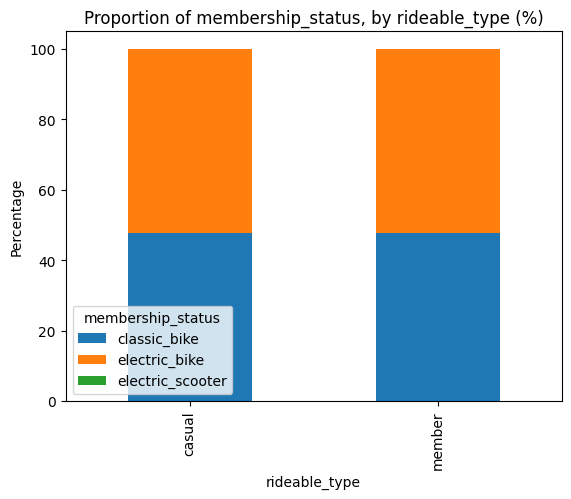

In [39]:
generate_prop_plot(summer_cyclistic_data, 'membership_status', 'rideable_type')

start_day             Friday     Monday   Saturday     Sunday   Thursday  \
membership_status                                                          
casual             15.182772  10.429466  21.951563  16.890497  12.494784   
member             14.461400  13.608948  14.220163  11.949625  15.015502   

start_day            Tuesday  Wednesday  
membership_status                        
casual             10.260219  12.790699  
member             14.623716  16.120646  


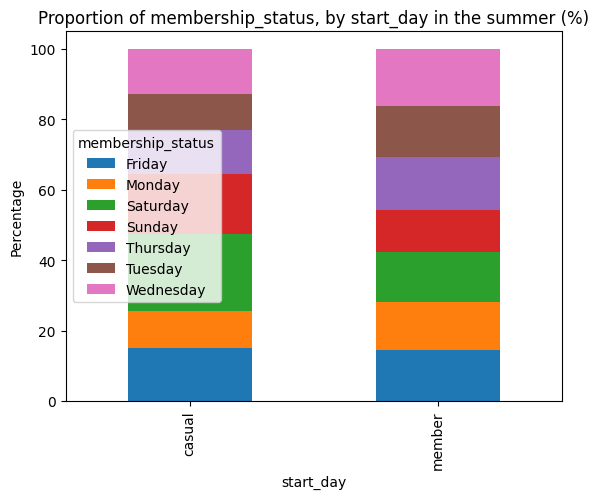

In [61]:
generate_prop_plot(summer_cyclistic_data, 'membership_status', 'start_day', 'summer')

rideable_type      classic_bike  electric_bike  electric_scooter
membership_status                                               
casual                39.248064      47.743704         13.008232
member                43.434146      51.269040          5.296814


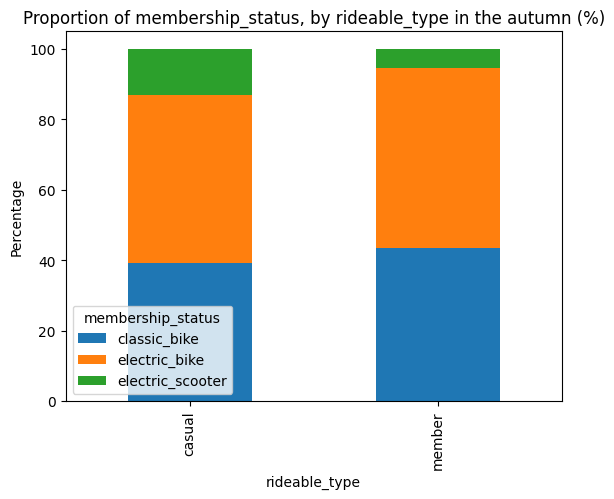

In [63]:
generate_prop_plot(autumn_cyclistic_data, 'membership_status', 'rideable_type', 'autumn')

In [64]:
generate_prop_plot(autumn_cyclistic_data, 'membership_status', 'start_day')

TypeError: generate_prop_plot() missing 1 required positional argument: 'season'

rideable_type      classic_bike  electric_bike
membership_status                             
casual                29.983012      70.016988
member                38.478872      61.521128


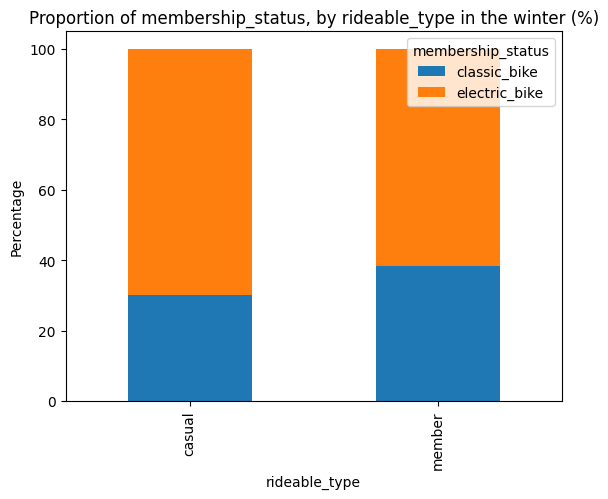

In [65]:
generate_prop_plot(winter_cyclistic_data, 'membership_status', 'rideable_type', 'winter')

start_day             Friday     Monday   Saturday     Sunday   Thursday  \
membership_status                                                          
casual             14.606767  14.495731  15.180822  13.534160  14.570125   
member             14.154834  16.312890  10.698350  10.048476  16.306286   

start_day            Tuesday  Wednesday  
membership_status                        
casual             13.775108  13.837288  
member             16.708891  15.770272  


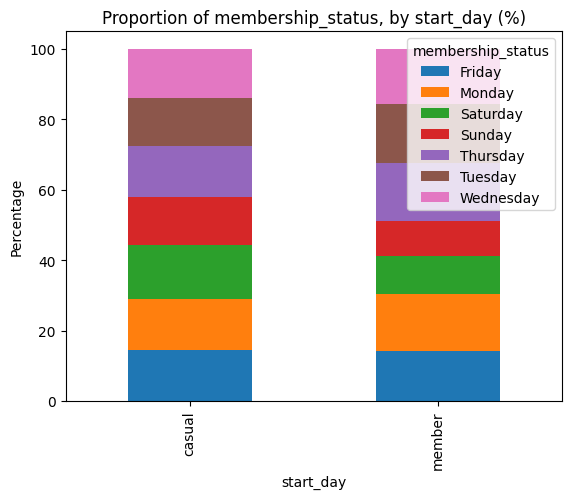

In [45]:
generate_prop_plot(winter_cyclistic_data, 'membership_status', 'start_day')